# **1. Importações**

## Importação dos Avaliadores

In [39]:
#%pip install autorank

In [40]:
from utils.FileManager import FileManager
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from autorank import autorank, plot_stats, create_report

In [41]:
from avaliacao.AvaliadorDriftBase import AvaliadorBatch
from avaliacao.AvaliadorDriftBase import AvaliadorPassivo
from experimento.ExperimentoDrift import Experimento

## Importação dos Detectores

In [42]:
# Importando detectores de drift
from detectores.ADWINDetector import ADWINDetector
from detectores.DDMDetector import DDMDetector
from detectores.EDDMDetector import EDDMDetector
from detectores.FHDDMDetector import FHDDMDetector
from detectores.HDDM_ADetector import HDDM_ADetector
from detectores.PageHinkleyDetector import PageHinkleyDetector
from detectores.HDDM_WDetector import HDDM_WDetector
from detectores.KSWINDetector import KSWINDetector

## Importação dos Regressores Off-line

In [43]:
# Importando modelos offline
from regressores.modelosOffline.LinearRegressionModelo import LinearRegressionModelo
from regressores.modelosOffline.KneighborsRegressorModelo import KneighborsRegressorModelo
from regressores.modelosOffline.LassoRegressionModelo import LassoRegressionModelo
from regressores.modelosOffline.RidgeRegressionModelo import RidgeRegressionModelo
from regressores.modelosOffline.SVRModelo import SVRModelo
from regressores.modelosOffline.RandomForestModelo import RandomForestModelo
from regressores.modelosOffline.MLPRegressorModelo import MLPRegressorModelo

## Importação dos Regressores On-line

In [ ]:
# Importando modelos online
from regressores.modelosOnline.BayesianLinearRegressionModelo import BayesianLinearRegressionModelo
from regressores.modelosOnline.HoeffdingTreeRegressorModelo import HoeffdingTreeRegressorModelo
from regressores.modelosOnline.KNNRegressorOnlineModelo import KNNRegressorOnlineModelo
from regressores.modelosOnline.LinearRegressionOnlineModelo import LinearRegressionOnlineModelo
from regressores.modelosOnline.OSELM import OSELMModelo

# **2. Definindo os Dados e Parâmetros**

## Dados

In [45]:
# Lista de séries temporais
series = [
    "AAPL",
    "B3SA3.SA",
    "IXIC",
    "DJI",
    "GSPC",
    "BVSP",
    "USDBRLX"
]

## Parâmetros

In [46]:
# Parâmetros do experimento
tamanho_batch = 300
lags = 10
repeticoes = 10  # Número de execuções para cada modelo-série

# **3. Definindo os Modelos e Avaliadores**

modelos = [
    {
        "nome": "LR + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": HDDM_ADetector
    },
    #{
    #    "nome": "KNN + HDDMA",
    #    "avaliador": AvaliadorBatch(),
    #    "modelo": KNNRegressorOnlineModelo,
    #    "detector": HDDM_ADetector
    #},   
    {
        "nome": "MLP + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": MLPRegressorModelo,
        "detector": HDDM_ADetector
    },
    {
        "nome": "Lasso + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": LassoRegressionModelo,
        "detector": HDDM_ADetector
    },    
    {
        "nome": "RF + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": RandomForestModelo,
        "detector": HDDM_ADetector
    },
    {
        "nome": "Ridge + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": HDDM_ADetector
    },
    {
        "nome": "SVR + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": SVRModelo,
        "detector": HDDM_ADetector
    },   


    {
        "nome": "BayesianLinear",
        "avaliador": AvaliadorPassivo(),
        "modelo": BayesianLinearRegressionModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "HoeffdingTree",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "KNNRegressorOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": KNNRegressorOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "LinearRegressionOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },    
]

modelos = [
    {
        "nome": "Ridge + KSWINDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": KSWINDetector
    },
    
    {
        "nome": "Lasso + KSWINDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": LassoRegressionModelo,
        "detector": KSWINDetector
    },

    {
        "nome": "LR + KSWINDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": KSWINDetector
    },
    
    {
        "nome": "BayesianLinear",
        "avaliador": AvaliadorPassivo(),
        "modelo": BayesianLinearRegressionModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "HoeffdingTree",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "KNNRegressorOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": KNNRegressorOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "LinearRegressionOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },    
]

modelos = [
    {
        "nome": "LR + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "KNN + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": KneighborsRegressorModelo,
        "detector": KSWINDetector
    },   
    {
        "nome": "MLP + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": MLPRegressorModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "Lasso + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": LassoRegressionModelo,
        "detector": KSWINDetector
    },    
    {
        "nome": "RF + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": RandomForestModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "Ridge + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "SVR + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": SVRModelo,
        "detector": KSWINDetector
    },   


    {
        "nome": "BayesianLinear",
        "avaliador": AvaliadorPassivo(),
        "modelo": BayesianLinearRegressionModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "HoeffdingTree",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "KNNRegressorOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": KNNRegressorOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "LinearRegressionOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },    
]

modelos = [
    {
        "nome": "Ridge + KSWINDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": KSWINDetector
    },
    
    {
        "nome": "Ridge + ADWINDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": ADWINDetector
    },
    
    {
        "nome": "Ridge + DDMDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": DDMDetector
    },
     
    {
        "nome": "Ridge + EDDMDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": EDDMDetector
    },
     
     
     {
        "nome": "Ridge + FHDDMDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": FHDDMDetector
    },
     
    {
        "nome": "Ridge + HDDM_ADetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": HDDM_ADetector
    },
    
    {
        "nome": "Ridge + PageHinkleyDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": PageHinkleyDetector
    },
    
    {
        "nome": "Ridge + HDDM_WDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": HDDM_WDetector
    },

    {
        "nome": "BayesianLinear",
        "avaliador": AvaliadorPassivo(),
        "modelo": BayesianLinearRegressionModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "HoeffdingTree",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "KNNRegressorOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": KNNRegressorOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "LinearRegressionOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },    
]

In [ ]:
modelos = [
    {
        "nome": "LR + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "KNN + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": KneighborsRegressorModelo,
        "detector": KSWINDetector
    },   
    {
        "nome": "MLP + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": MLPRegressorModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "Lasso + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": LassoRegressionModelo,
        "detector": KSWINDetector
    },    
    {
        "nome": "RF + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": RandomForestModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "Ridge + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "SVR + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": SVRModelo,
        "detector": KSWINDetector
    },   


    {
        "nome": "BayesianLinear",
        "avaliador": AvaliadorPassivo(),
        "modelo": BayesianLinearRegressionModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "HoeffdingTree",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "KNNRegressorOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": KNNRegressorOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "LinearRegressionOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None  # Passivo, não usa detector
    }, 
    {
        "nome": "OS-ELM",
        "avaliador": AvaliadorPassivo(),
        "modelo": OSELMModelo,
        "detector": None  # Passivo, não usa detector
    },  
]

# **4. Executando o Experimento**

In [48]:
# Criando e executando o experimento
experimento = Experimento(
    series=series,
    modelos=modelos,
    tamanho_batch=tamanho_batch,
    lags=lags,
    repeticoes=repeticoes
)

resultados = experimento.executar()

Executando LR + KSWIN na série: AAPL
Executando KNN + KSWIN na série: AAPL
Executando MLP + KSWIN na série: AAPL
Executando Lasso + KSWIN na série: AAPL
Executando RF + KSWIN na série: AAPL
Executando Ridge + KSWIN na série: AAPL
Executando SVR + KSWIN na série: AAPL
Executando BayesianLinear na série: AAPL
Executando HoeffdingTree na série: AAPL
Executando KNNRegressorOnline na série: AAPL
Executando LinearRegressionOnline na série: AAPL
Executando LR + KSWIN na série: B3SA3.SA
Executando KNN + KSWIN na série: B3SA3.SA
Executando MLP + KSWIN na série: B3SA3.SA
Executando Lasso + KSWIN na série: B3SA3.SA
Executando RF + KSWIN na série: B3SA3.SA
Executando Ridge + KSWIN na série: B3SA3.SA
Executando SVR + KSWIN na série: B3SA3.SA
Executando BayesianLinear na série: B3SA3.SA
Executando HoeffdingTree na série: B3SA3.SA
Executando KNNRegressorOnline na série: B3SA3.SA
Executando LinearRegressionOnline na série: B3SA3.SA
Executando LR + KSWIN na série: IXIC
Executando KNN + KSWIN na série: 

In [49]:
# salvando os resultados
arquivo_salvamento = "Experimento_regressores.csv"
FileManager.salvar_resultados(resultados, arquivo_salvamento)


Resultados salvos em: Experimento_regressores.csv


'Experimento_regressores.csv'

# **5. Análise Estatística dos Resultados**

## Leitura dos Resultados

In [50]:
# 1. Ler o arquivo CSV
df = pd.read_csv(arquivo_salvamento)

## Tabelas de Resultados

In [51]:
# 3. Agrupar por modelo e calcular estatísticas
summary = df.groupby(['serie', 'modelo']).agg(
    mae_mean=('mae', 'mean'),
    mae_std=('mae', 'std'),
    qtd_deteccoes_mean=('qtd_deteccoes', 'mean'),
    qtd_deteccoes_std=('qtd_deteccoes', 'std')
).reset_index()

### Média do MAE

In [52]:
# Tabela para a média do MAE
mae_mean_table = summary.pivot(index='serie', columns='modelo', values='mae_mean')
mae_mean_table

modelo,BayesianLinear,HoeffdingTree,KNN + KSWIN,KNNRegressorOnline,LR + KSWIN,Lasso + KSWIN,LinearRegressionOnline,MLP + KSWIN,RF + KSWIN,Ridge + KSWIN,SVR + KSWIN
serie,,,,,,,,,,,
AAPL,0.007968,0.083247,0.072905,0.011122,0.006682,0.026972,1.202358e+10,0.023629,0.062727,0.008284,0.018307
B3SA3.SA,0.029469,0.038586,0.244733,0.046501,0.030246,0.051496,3.858648e-02,0.096070,0.236628,0.033732,0.038007
BVSP,0.017539,0.024016,0.106392,0.024905,0.016243,0.040748,2.259444e-02,0.042709,0.104028,0.016432,0.030301
DJI,0.013574,0.017122,0.129120,0.018216,0.013476,0.051227,1.685547e-02,0.043727,0.102069,0.014555,0.034581
GSPC,0.005660,0.120804,0.048853,0.007570,0.005526,0.025070,1.788413e+10,0.020539,0.050611,0.007321,0.018846
IXIC,0.008735,0.051417,0.067899,0.011865,0.008448,0.036579,9.147726e+09,0.029208,0.068128,0.010293,0.022840
USDBRLX,0.019844,0.026357,0.173796,0.028493,0.020367,0.060274,2.635711e-02,0.060100,0.164705,0.024490,0.030330


### Desvio do MAE

In [53]:
# Tabela para o desvio padrão do MAE
mae_std_table = summary.pivot(index='serie', columns='modelo', values='mae_std')
mae_std_table

modelo,BayesianLinear,HoeffdingTree,KNN + KSWIN,KNNRegressorOnline,LR + KSWIN,Lasso + KSWIN,LinearRegressionOnline,MLP + KSWIN,RF + KSWIN,Ridge + KSWIN,SVR + KSWIN
serie,,,,,,,,,,,
AAPL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001534,0.005813,0.0,0.0
B3SA3.SA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020946,0.009653,0.0,0.0
BVSP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004984,0.002649,0.0,0.0
DJI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003321,0.005747,0.0,0.0
GSPC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002279,0.003247,0.0,0.0
IXIC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003797,0.004624,0.0,0.0
USDBRLX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012106,0.007443,0.0,0.0


### Média Detecções

In [54]:
# Tabela para a média das detecções
deteccoes_mean_table = summary.pivot(index='serie', columns='modelo', values='qtd_deteccoes_mean')
deteccoes_mean_table

modelo,BayesianLinear,HoeffdingTree,KNN + KSWIN,KNNRegressorOnline,LR + KSWIN,Lasso + KSWIN,LinearRegressionOnline,MLP + KSWIN,RF + KSWIN,Ridge + KSWIN,SVR + KSWIN
serie,,,,,,,,,,,
AAPL,NaN,NaN,26.0,NaN,19.0,26.0,NaN,26.5,26.7,25.0,26.0
B3SA3.SA,NaN,NaN,10.0,NaN,7.0,5.0,NaN,8.7,9.2,6.0,6.0
BVSP,NaN,NaN,19.0,NaN,12.0,17.0,NaN,17.3,18.0,13.0,16.0
DJI,NaN,NaN,20.0,NaN,14.0,19.0,NaN,19.1,19.1,14.0,19.0
GSPC,NaN,NaN,59.0,NaN,36.0,57.0,NaN,58.4,56.9,54.0,58.0
IXIC,NaN,NaN,33.0,NaN,21.0,32.0,NaN,32.7,32.4,28.0,33.0
USDBRLX,NaN,NaN,12.0,NaN,8.0,9.0,NaN,10.8,11.4,10.0,10.0


## Teste Estatístico

In [55]:
# 4. Preparar dados para autorank (uma linha por repetição, colunas por modelo)
df_mae = df.pivot_table(index=["serie", "repeticao"], columns="modelo", values="mae")
# Remover qualquer valor NaN para análise (caso haja)
df_mae = df_mae.dropna()
# Tabela de desempenho
df_mae

modelo             BayesianLinear  HoeffdingTree  KNN + KSWIN  \
serie   repeticao                                               
AAPL    1                0.007968       0.083247     0.072905   
        2                0.007968       0.083247     0.072905   
        3                0.007968       0.083247     0.072905   
        4                0.007968       0.083247     0.072905   
        5                0.007968       0.083247     0.072905   
...                           ...            ...          ...   
USDBRLX 6                0.019844       0.026357     0.173796   
        7                0.019844       0.026357     0.173796   
        8                0.019844       0.026357     0.173796   
        9                0.019844       0.026357     0.173796   
        10               0.019844       0.026357     0.173796   

modelo             KNNRegressorOnline  LR + KSWIN  Lasso + KSWIN  \
serie   repeticao                                                  
AAPL    1                    0.011122    0.006682       0.026972   
        2                    0.011122    0.006682       0.026972   
        3                    0.011122    0.006682       0.026972   
        4                    0.011122    0.006682       0.026972   
        5                    0.011122    0.006682       0.026972   
...                               ...         ...            ...   
USDBRLX 6                    0.028493    0.020367       0.060274   
        7                    0.028493    0.020367       0.060274   
        8                    0.028493    0.020367       0.060274   
        9                    0.028493    0.020367       0.060274   
        10                   0.028493    0.020367       0.060274   

modelo             LinearRegressionOnline  MLP + KSWIN  RF + KSWIN  \
serie   repeticao                                                    
AAPL    1                    1.202358e+10     0.020546    0.064667   
        2                    1.202358e+10     0.025428    0.065269   
        3                    1.202358e+10     0.022030    0.067741   
        4                    1.202358e+10     0.024208    0.052663   
        5                    1.202358e+10     0.023619    0.065828   
...                                   ...          ...         ...   
USDBRLX 6                    2.635711e-02     0.072069    0.163330   
        7                    2.635711e-02     0.051634    0.162423   
        8                    2.635711e-02     0.064947    0.162492   
        9                    2.635711e-02     0.055233    0.185686   
        10                   2.635711e-02     0.064011    0.161818   

modelo             Ridge + KSWIN  SVR + KSWIN  
serie   repeticao                              
AAPL    1               0.008284     0.018307  
        2               0.008284     0.018307  
        3               0.008284     0.018307  
        4               0.008284     0.018307  
        5               0.008284     0.018307  
...                          ...          ...  
USDBRLX 6               0.024490     0.030330  
        7               0.024490     0.030330  
        8               0.024490     0.030330  
        9               0.024490     0.030330  
        10              0.024490     0.030330  

[70 rows x 11 columns]

In [56]:
# computing the most appropriate statistical test
results = autorank(-df_mae)
# printing the report
create_report(results)

The statistical analysis was conducted for 11 populations with 70 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations KNN + KSWIN (p=0.000), RF + KSWIN (p=0.000), Lasso + KSWIN (p=0.000), MLP + KSWIN (p=0.000), LinearRegressionOnline (p=0.000), HoeffdingTree (p=0.000), SVR + KSWIN (p=0.000), KNNRegressorOnline (p=0.000), Ridge + KSWIN (p=0.000), BayesianLinear (p=0.000), and LR + KSWIN (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populati

<Axes: >

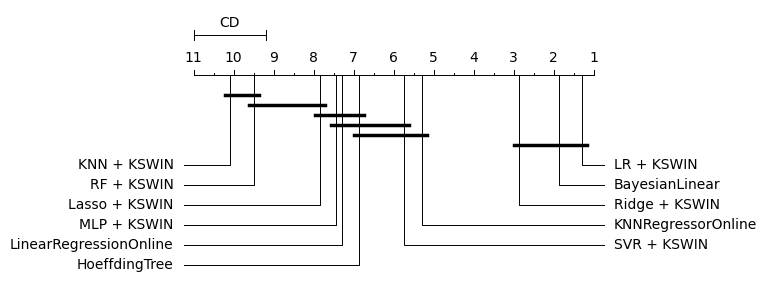

In [57]:
# plotting the results
plot_stats(results, allow_insignificant=True)